##### Dataset

In [1]:
# toxic-comments.csv
# https://mitu.co.in/dataset

##### Import the libraries

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU
from sklearn.model_selection import train_test_split
import re

##### Load the dataset

In [4]:
df = pd.read_csv('toxic-comments.csv')

In [5]:
df.shape

(159571, 8)

In [6]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
# define target variables
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [8]:
comments = df.sum(numeric_only=True)

In [9]:
import matplotlib.pyplot as plt 

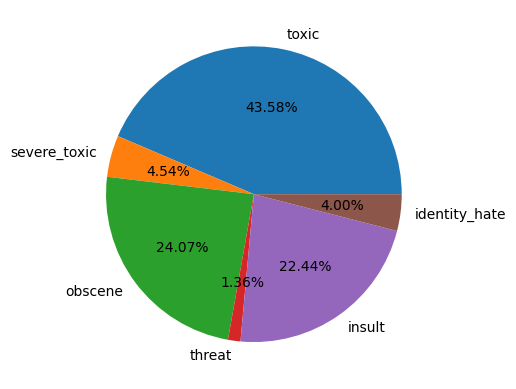

In [10]:
plt.pie(comments.values, labels=comments.index, autopct='%2.2f%%');

In [11]:
neutral = df.sum(axis = 1, numeric_only=True)

In [12]:
sum(neutral==0)

143346

##### Data Cleaning

In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+',' ', text)
    return text

In [15]:
df['comment_text'].apply(clean_text)

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3          more i can t make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566     and for the second time of asking when your v...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really don t think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [16]:
df['comment_text'] = df['comment_text'].apply(clean_text)

In [17]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


##### Separate the input and output variables

In [19]:
x = df['comment_text']
y = df[toxicities].values

In [20]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
y.shape

(159571, 6)

##### Data Preparation

In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [25]:
padded_sequences.shape

(159571, 200)

##### Cross - Validation

In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=0
)

In [28]:
x_train.shape, x_test.shape

((127656, 200), (31915, 200))

##### Build the model

In [32]:
model = Sequential()

model.add(Embedding(5000, 128, input_length=200))
model.add(GRU(64))
model.add(Dense(6, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=3, batch_size=32, 
         validation_data=(x_test, y_test))

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 509s 127ms/step - accuracy: 0.9313 - loss: 0.0933 - val_accuracy: 0.9936 - val_loss: 0.0503
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 486s 122ms/step - accuracy: 0.9926 - loss: 0.0464 - val_accuracy: 0.9922 - val_loss: 0.0478
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 333s 83ms/step - accuracy: 0.9861 - loss: 0.0409 - val_accuracy: 0.9838 - val_loss: 0.0492


In [51]:
sample1 = 'You are waste of space. World is better without you.'
sample2 = 'Your life will be so beautiful with her.'
sample3 = 'You are stupid. No one cares about your opinion. Just shut up.'

In [55]:
def predict(new_comment):
    new_sequence = tokenizer.texts_to_sequences([clean_text(new_comment)])
    new_seq_pad = pad_sequences(new_sequence, maxlen=200)
    prediction = model.predict(new_seq_pad, verbose=False)[0]
    return prediction

In [62]:
prediction = predict(sample3)
for toxicity, prob in zip(toxicities, prediction):
    print(toxicity,'-->',prob)

toxic --> 0.9867017
severe_toxic --> 0.057251725
obscene --> 0.6163027
threat --> 0.006532391
insult --> 0.7598061
identity_hate --> 0.036758028


In [54]:
prediction

array([0.03630552, 0.00173023, 0.00901352, 0.00010031, 0.00560588,
       0.00251771], dtype=float32)